In [1]:
#!pip install -U statsmodels

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("BLK.csv", index_col=0, parse_dates= True)

In [5]:
df.head()

,MICROSOFT,SANDP,CPI,INDPRO,M1SUPPLY,CCREDIT,BMINUSA,USTB3M,USTB10Y,BLACKROCK
Date,,,,,,,,,,
1999-10-01,46.281250,1362.930054,168.2,92.9976,1095.1,1519.3952,0.83,5.02,6.11,14.1250
1999-11-01,45.523399,1388.910034,168.3,93.4440,1113.0,1531.9609,0.79,5.23,6.03,14.7500
1999-12-01,58.375000,1469.250000,168.3,94.1555,1148.2,1553.6220,0.64,5.36,6.28,18.5625
2000-02-01,44.687500,1366.420044,169.8,94.4329,1097.4,1549.3285,0.61,5.73,6.52,17.7500
2000-03-01,53.125000,1498.579956,171.2,94.7926,1108.9,1553.7650,0.69,5.86,6.26,21.7500


In [6]:
df.columns = df.columns.str.replace('#', '')

In [7]:
df.head()

,MICROSOFT,SANDP,CPI,INDPRO,M1SUPPLY,CCREDIT,BMINUSA,USTB3M,USTB10Y,BLACKROCK
Date,,,,,,,,,,
1999-10-01,46.281250,1362.930054,168.2,92.9976,1095.1,1519.3952,0.83,5.02,6.11,14.1250
1999-11-01,45.523399,1388.910034,168.3,93.4440,1113.0,1531.9609,0.79,5.23,6.03,14.7500
1999-12-01,58.375000,1469.250000,168.3,94.1555,1148.2,1553.6220,0.64,5.36,6.28,18.5625
2000-02-01,44.687500,1366.420044,169.8,94.4329,1097.4,1549.3285,0.61,5.73,6.52,17.7500
2000-03-01,53.125000,1498.579956,171.2,94.7926,1108.9,1553.7650,0.69,5.86,6.26,21.7500


In [8]:
df.shape

(143, 10)

In [9]:
df.columns

Index(['MICROSOFT', 'SANDP', 'CPI', 'INDPRO', 'M1SUPPLY', 'CCREDIT', 'BMINUSA',
       'USTB3M', 'USTB10Y', 'BLACKROCK'],
      dtype='object')

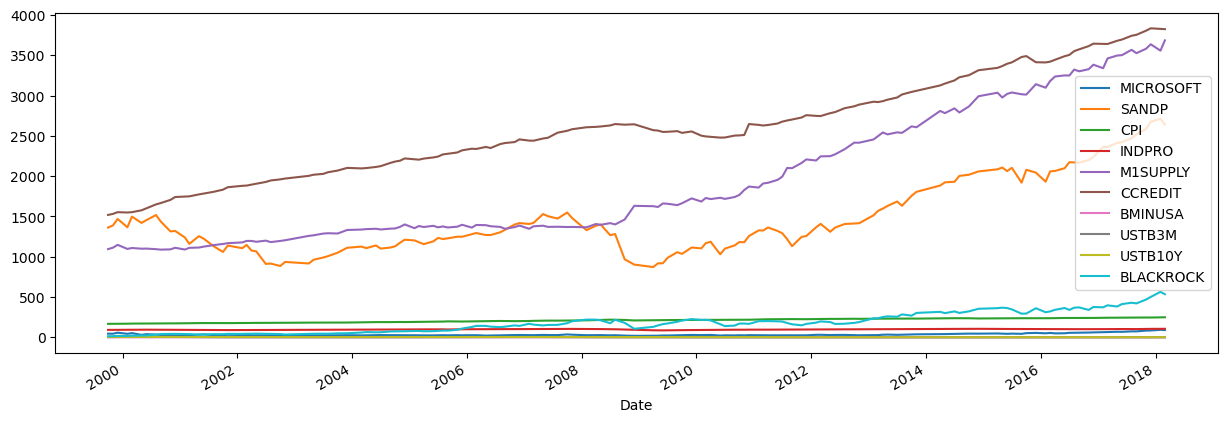

In [10]:
df.plot(figsize=(15,5));

In [11]:
df['lstdiff'] = df['BLACKROCK'].diff()

<AxesSubplot:xlabel='Date'>

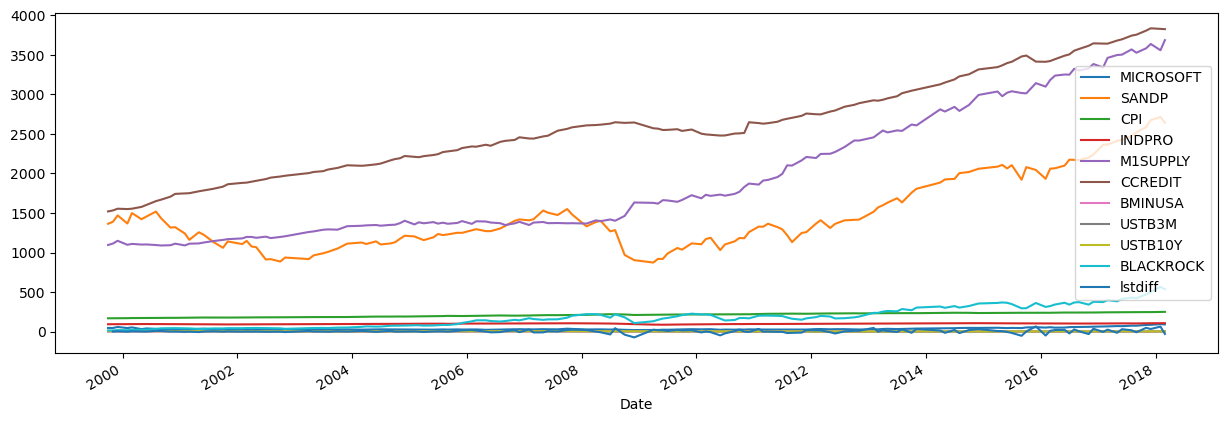

In [12]:
df.plot(figsize = (15,5))

In [13]:
df['Logblk'] = np.log(df['BLACKROCK'])

<AxesSubplot:xlabel='Date'>

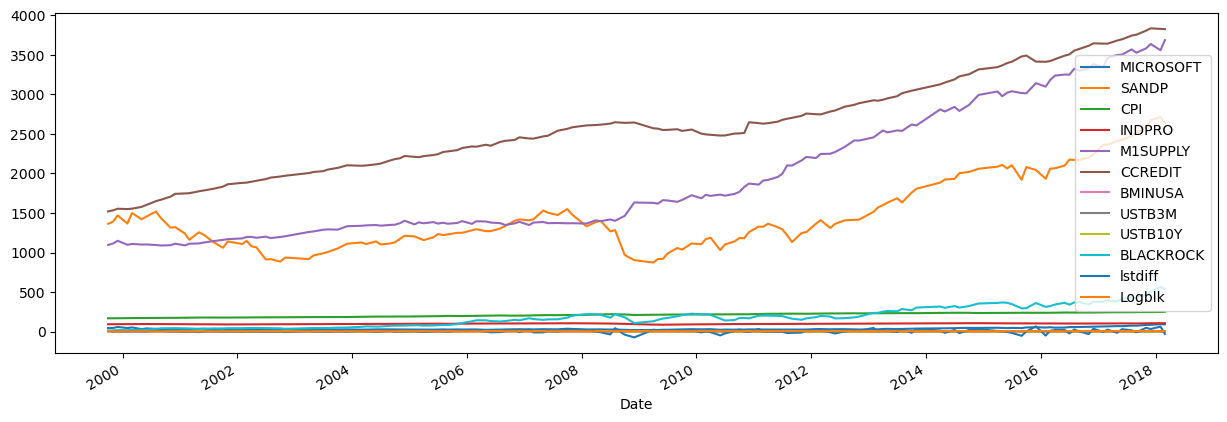

In [14]:
df.plot(figsize= (15,5))

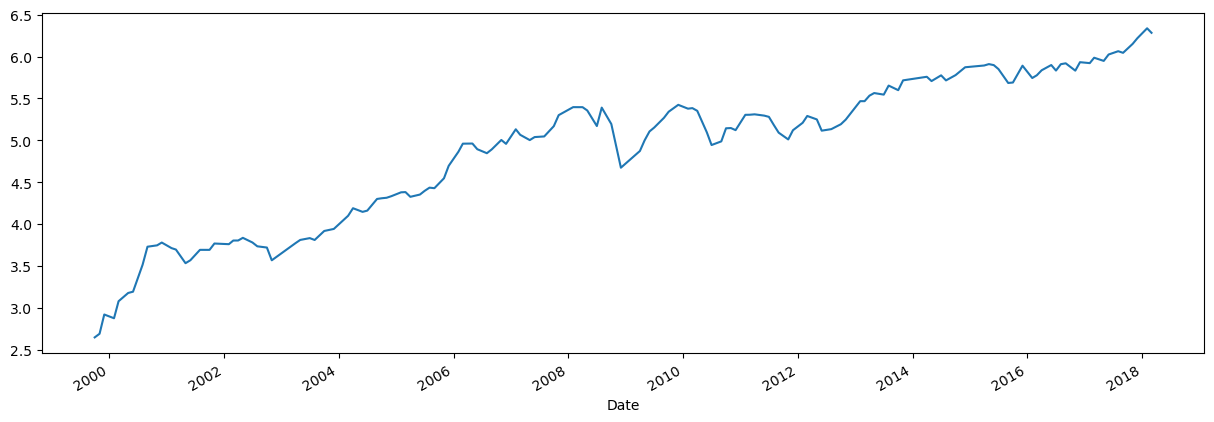

In [16]:
df['Logblk'].plot(figsize=(15,5));

In [17]:
from statsmodels.tsa.arima.model import ARIMA

In [20]:
df.index.freq = 'MS'

Ntest = 12

train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

ValueError: Inferred frequency None from passed values does not conform to passed frequency MS

In [19]:
train.shape

NameError: name 'train' is not defined

In [ ]:
test.shape

In [ ]:
test

In [ ]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [ ]:
train_idx

In [ ]:
arima = ARIMA(train['Passengers'], order =(1,0,0))

In [ ]:
arima_result = arima.fit()

In [ ]:
df.loc[train_idx, 'AR(1)'] = arima_result.predict(start = train.index[0], end= train.index[-1])

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df[['Passengers', 'AR(1)']].plot(figsize= (15,5));

In [ ]:
prediction_result = arima_result.get_forecast(Ntest)


In [ ]:
forecast = prediction_result.predicted_mean

In [ ]:
df.loc[test_idx, 'AR(1)']= forecast

In [ ]:
df.tail()

In [ ]:
df[['Passengers', 'AR(1)']].plot(figsize = (15,5));

In [ ]:
type(prediction_result)

In [ ]:
prediction_result.conf_int()

In [ ]:
def plot_fit_and_forecast(result):
    fig, ax = plt.subplots(figsize = (15,5))
    ax.plot(df['Passengers'], label = 'data')
    
    #plot the curve fitted on train set
    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color = 'green', label = 'fitted')
    
    #forecast the test set
    
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int['lower Passengers'], conf_int['upper Passengers']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label = 'Forecast')
    ax.fill_between(test.index, \
                   lower, upper,\
                   color = 'red', alpha = 0.3)
    
    ax.legend()

In [ ]:
plot_fit_and_forecast(arima_result)

In [ ]:
arima = ARIMA(train['Passengers'], order =(10,0,0)) #AR(10)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

In [ ]:
arima = ARIMA(train['Passengers'], order =(0,0,1)) #MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

In [ ]:
df['Log1stDiff'] = df['LogPassengers'].diff()

In [ ]:
df['Log1stDiff'].plot(figsize = (15,5));

In [ ]:
def plot_fit_and_forecast(result, d, col= 'Passengers'):
    fig, ax = plt.subplots(figsize = (15,5))
    ax.plot(df[col], label = 'data')
    
    #plot the curve fitted on train set
    train_pred = result.predict(start = train.index[d], end= train.index[-1])
    ax.plot(train.index[d:], train_pred, color = 'green',  label = 'fitted')
   
    
    #forecast the test set
    
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label = 'forecast')
    ax.fill_between(test.index, \
                   lower, upper,\
                   color = 'red', alpha = 0.3)
    
    ax.legend()

In [ ]:
arima = ARIMA(train['Passengers'], order = (8,1,1))
arima_result_811 = arima.fit()

In [ ]:
plot_fit_and_forecast(arima_result_811,1)

In [ ]:
arima = ARIMA(train['LogPassengers'], order = (8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast(arima_result_log811,1, col='LogPassengers')

In [ ]:
arima = ARIMA(train['Passengers'], order = (12,1,0))
arima_result_1210 = arima.fit()
plot_fit_and_forecast(arima_result_1210,1, col='Passengers')

In [ ]:
arima = ARIMA(train['LogPassengers'], order = (12,1,0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast(arima_result_log1210,1, col='LogPassengers')

In [ ]:
def rmse(result, is_logged):
    forecast = result.forecast(Ntest)
    if is_logged:
        forecast = np.exp(forecast)
    t = test['Passengers']
    y = forecast
    return np.sqrt(np.mean((t-y)**2))
         

In [ ]:
print("ARIMA(8,1,1):", rmse(arima_result_811, False))
print("ARIMA(8,1,1) logged:", rmse(arima_result_log811, True))
print("ARIMA(12,1,0):", rmse(arima_result_1210, False))
print("ARIMA(12,1,0) logged:", rmse(arima_result_log1210, True))

In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm

In [ ]:
model = pm.auto_arima(train['Passengers'],
                     trace = True,
                     suppress_warnings = True,
                     seasonal = True, m=12)

In [ ]:
model.summary()

In [ ]:
test_pred, confint = model.predict(n_periods = Ntest, return_conf_int = True)

In [ ]:
fig, ax =plt.subplots(figsize= (10,5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)

ax.legend();

In [ ]:
train_pred = model.predict_in_sample(start=0, end=-1)

In [ ]:
fig, ax =plt.subplots(figsize= (10,5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)

ax.legend();

In [ ]:
logmodel = pm.auto_arima(train['LogPassengers'],
                     trace = True,
                     suppress_warnings = True,
                     seasonal = True, m=12)

In [ ]:
logmodel.summary()

In [ ]:
test_pred_log, confint = logmodel.predict(n_periods = Ntest, return_conf_int = True)
fig, ax =plt.subplots(figsize= (10,5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)

ax.legend();

In [ ]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)
fig, ax =plt.subplots(figsize= (10,5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)

ax.legend();


In [ ]:
model.predict(Ntest)

In [ ]:
#Para utlizar la función realizando la transformación inversa del logaritmo cambiamos .forecast por .predict
def rmse1(result, is_logged):
    forecast = result.predict(n_periods = Ntest)
    if is_logged:
        forecast = np.exp(forecast)
    t = test["Passengers"]
    y = forecast
    return np.sqrt(np.mean((t-y)**2))

In [ ]:
print("Non-logged RMSE:", rmse1(model, False))

In [ ]:
#forecast RMSE
def rmse2(t,y):
    return np.sqrt(np.mean((t-y)**2))

In [ ]:
print("Non-logged RMSE:", rmse2(test['Passengers'], test_pred))

In [ ]:
print("Logged RMSE:", rmse2(test['Passengers'], np.exp(test_pred_log)))

In [ ]:
print("Logged RMSE:", rmse1(logmodel, True))